In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Planning

In [3]:
from pydataset import data

we are going to work with the iris dataset

based on what we have seen from iris, we know we are going to have 5 columns (fields)
- petal length
- petal width
- sepal length
- sepal width
- species

Problem statement: can we reliably use the other four present fields to predict which species of iris flower that I have present

X: potentially:  petal length, petal width, sepal length, sepal width

y: species, a label wheich meas wthis is going to jbe a supervised learning problem, specificaly the classification type since it is a discrete label

# Acquisition

In [4]:
iris = data('iris')

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


# Preparation

In [6]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [7]:
# lets clean up the column names

iris.columns = [col.lower().replace('.','_') for col in iris.columns]
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# Exploration

In [9]:
train_val, test = train_test_split(iris,
                                   train_size=0.8,
                                   random_state=1349,
                                   stratify=iris['species'])
train, validate = train_test_split(train_val,
                                   train_size=0.7,
                                   random_state=1349,
                                   stratify=train_val['species'])

In [ ]:
train.shape, validate.shape, 

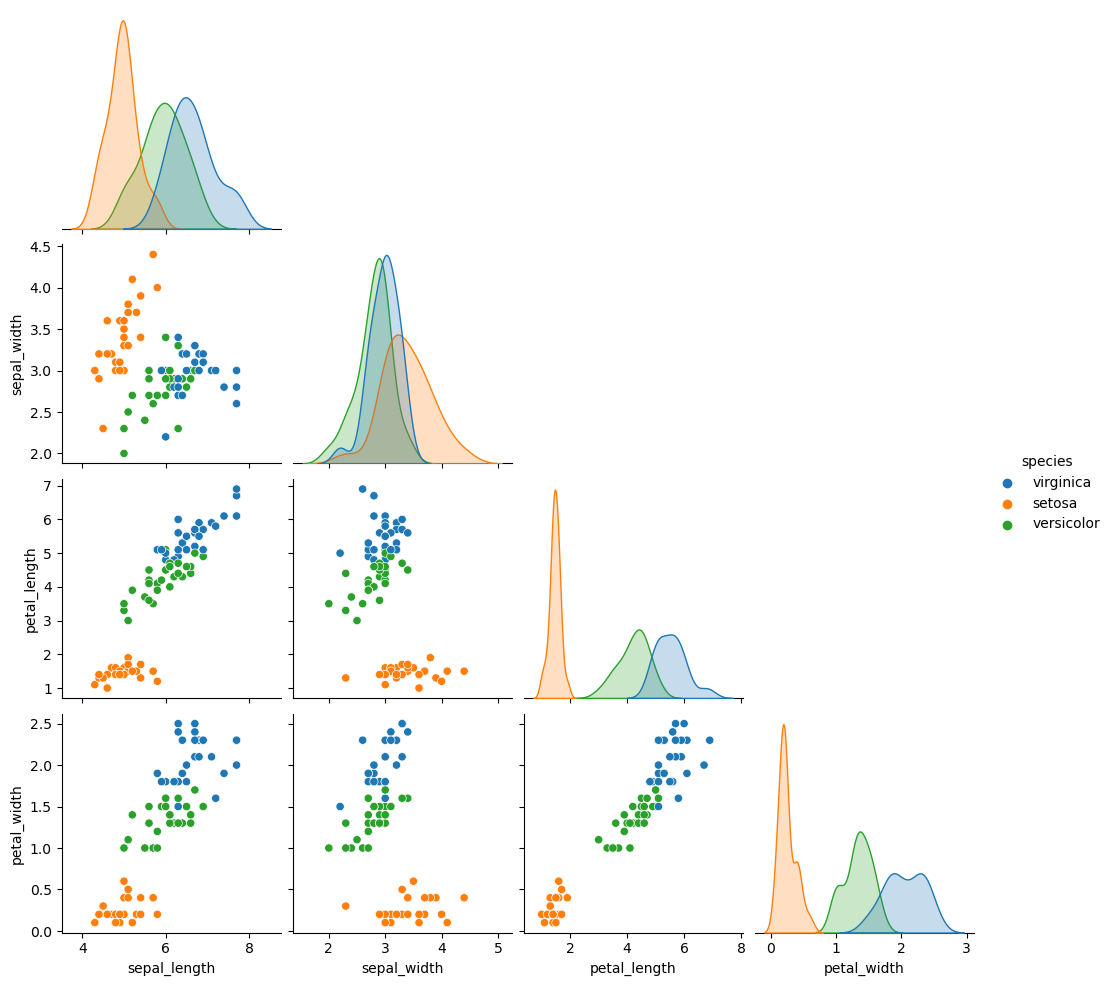

In [42]:
sns.pairplot(train, corner=True, hue='species')
plt.show()

curory takeaways here: petal width, petal length, sepal length, sepal width

# Modeling

In [14]:
X_cols = train.columns.to_list()
y_cols = 'species'

In [15]:
X_cols.remove('species')

In [16]:
X_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [19]:
train[y_cols].head()

139     virginica
8          setosa
80     versicolor
75     versicolor
98     versicolor
Name: species, dtype: object

- make the thing
- fit the thing
- use the ghing

In [20]:
# make the thing
clf = DecisionTreeClassifier()

In [21]:
clf

DecisionTreeClassifier()

In [22]:
# fit the thing
clf.fit(train[X_cols], train[y_cols])

# note that we are not assigning clf.fit to anything
# clf.fit changes the object itself
# which means it is ready to use

DecisionTreeClassifier()

In [23]:
# use the thing
clf.predict(train[X_cols])

array(['virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'virginica', 'setosa', 'virginica', 'setosa',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'virginica', 'setosa',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'setosa

In [24]:
# assign the prediction output to a variable
model_1_preds = clf.predict(train[X_cols])

In [25]:
# lets make a second model
# before we statr before talklking about scores

# note that the perameters are set when we create the DecisionTreeClassifier

# make the thing
clf1 = DecisionTreeClassifier(max_depth=2)
# fit the thing
clf1.fit(train[X_cols], train[y_cols])
# use the thing
model_2_preds = clf1.predict(train[X_cols])

In [34]:
# lets make a third model

# make the thing
clf2 = DecisionTreeClassifier(max_depth=1)
# fit the thing
clf2.fit(train[X_cols], train[y_cols])
# use the thing
model_3_preds = clf2.predict(train[X_cols])

In [ ]:
# note:
# .fit calls take in a X and y as the labels
# that are there to train the model

# predict will just take in the domain

In [26]:
clf.score(train[X_cols], train[y_cols])

1.0

In [27]:
clf1.score(train[X_cols], train[y_cols])

0.9642857142857143

In [35]:
clf2.score(train[X_cols], train[y_cols])

0.6666666666666666

In [31]:
accuracy_score(train[y_cols], model_1_preds)

1.0

In [32]:
accuracy_score(train[y_cols], model_2_preds)

0.9642857142857143

In [36]:
accuracy_score(train[y_cols], model_3_preds)

0.6666666666666666

In [38]:
print(export_text(clf, feature_names=X_cols))

|--- petal_width <= 0.80
|   |--- class: setosa
|--- petal_width >  0.80
|   |--- petal_length <= 4.75
|   |   |--- class: versicolor
|   |--- petal_length >  4.75
|   |   |--- petal_width <= 1.75
|   |   |   |--- petal_length <= 4.95
|   |   |   |   |--- class: versicolor
|   |   |   |--- petal_length >  4.95
|   |   |   |   |--- petal_width <= 1.55
|   |   |   |   |   |--- class: virginica
|   |   |   |   |--- petal_width >  1.55
|   |   |   |   |   |--- petal_length <= 5.45
|   |   |   |   |   |   |--- class: versicolor
|   |   |   |   |   |--- petal_length >  5.45
|   |   |   |   |   |   |--- class: virginica
|   |   |--- petal_width >  1.75
|   |   |   |--- class: virginica



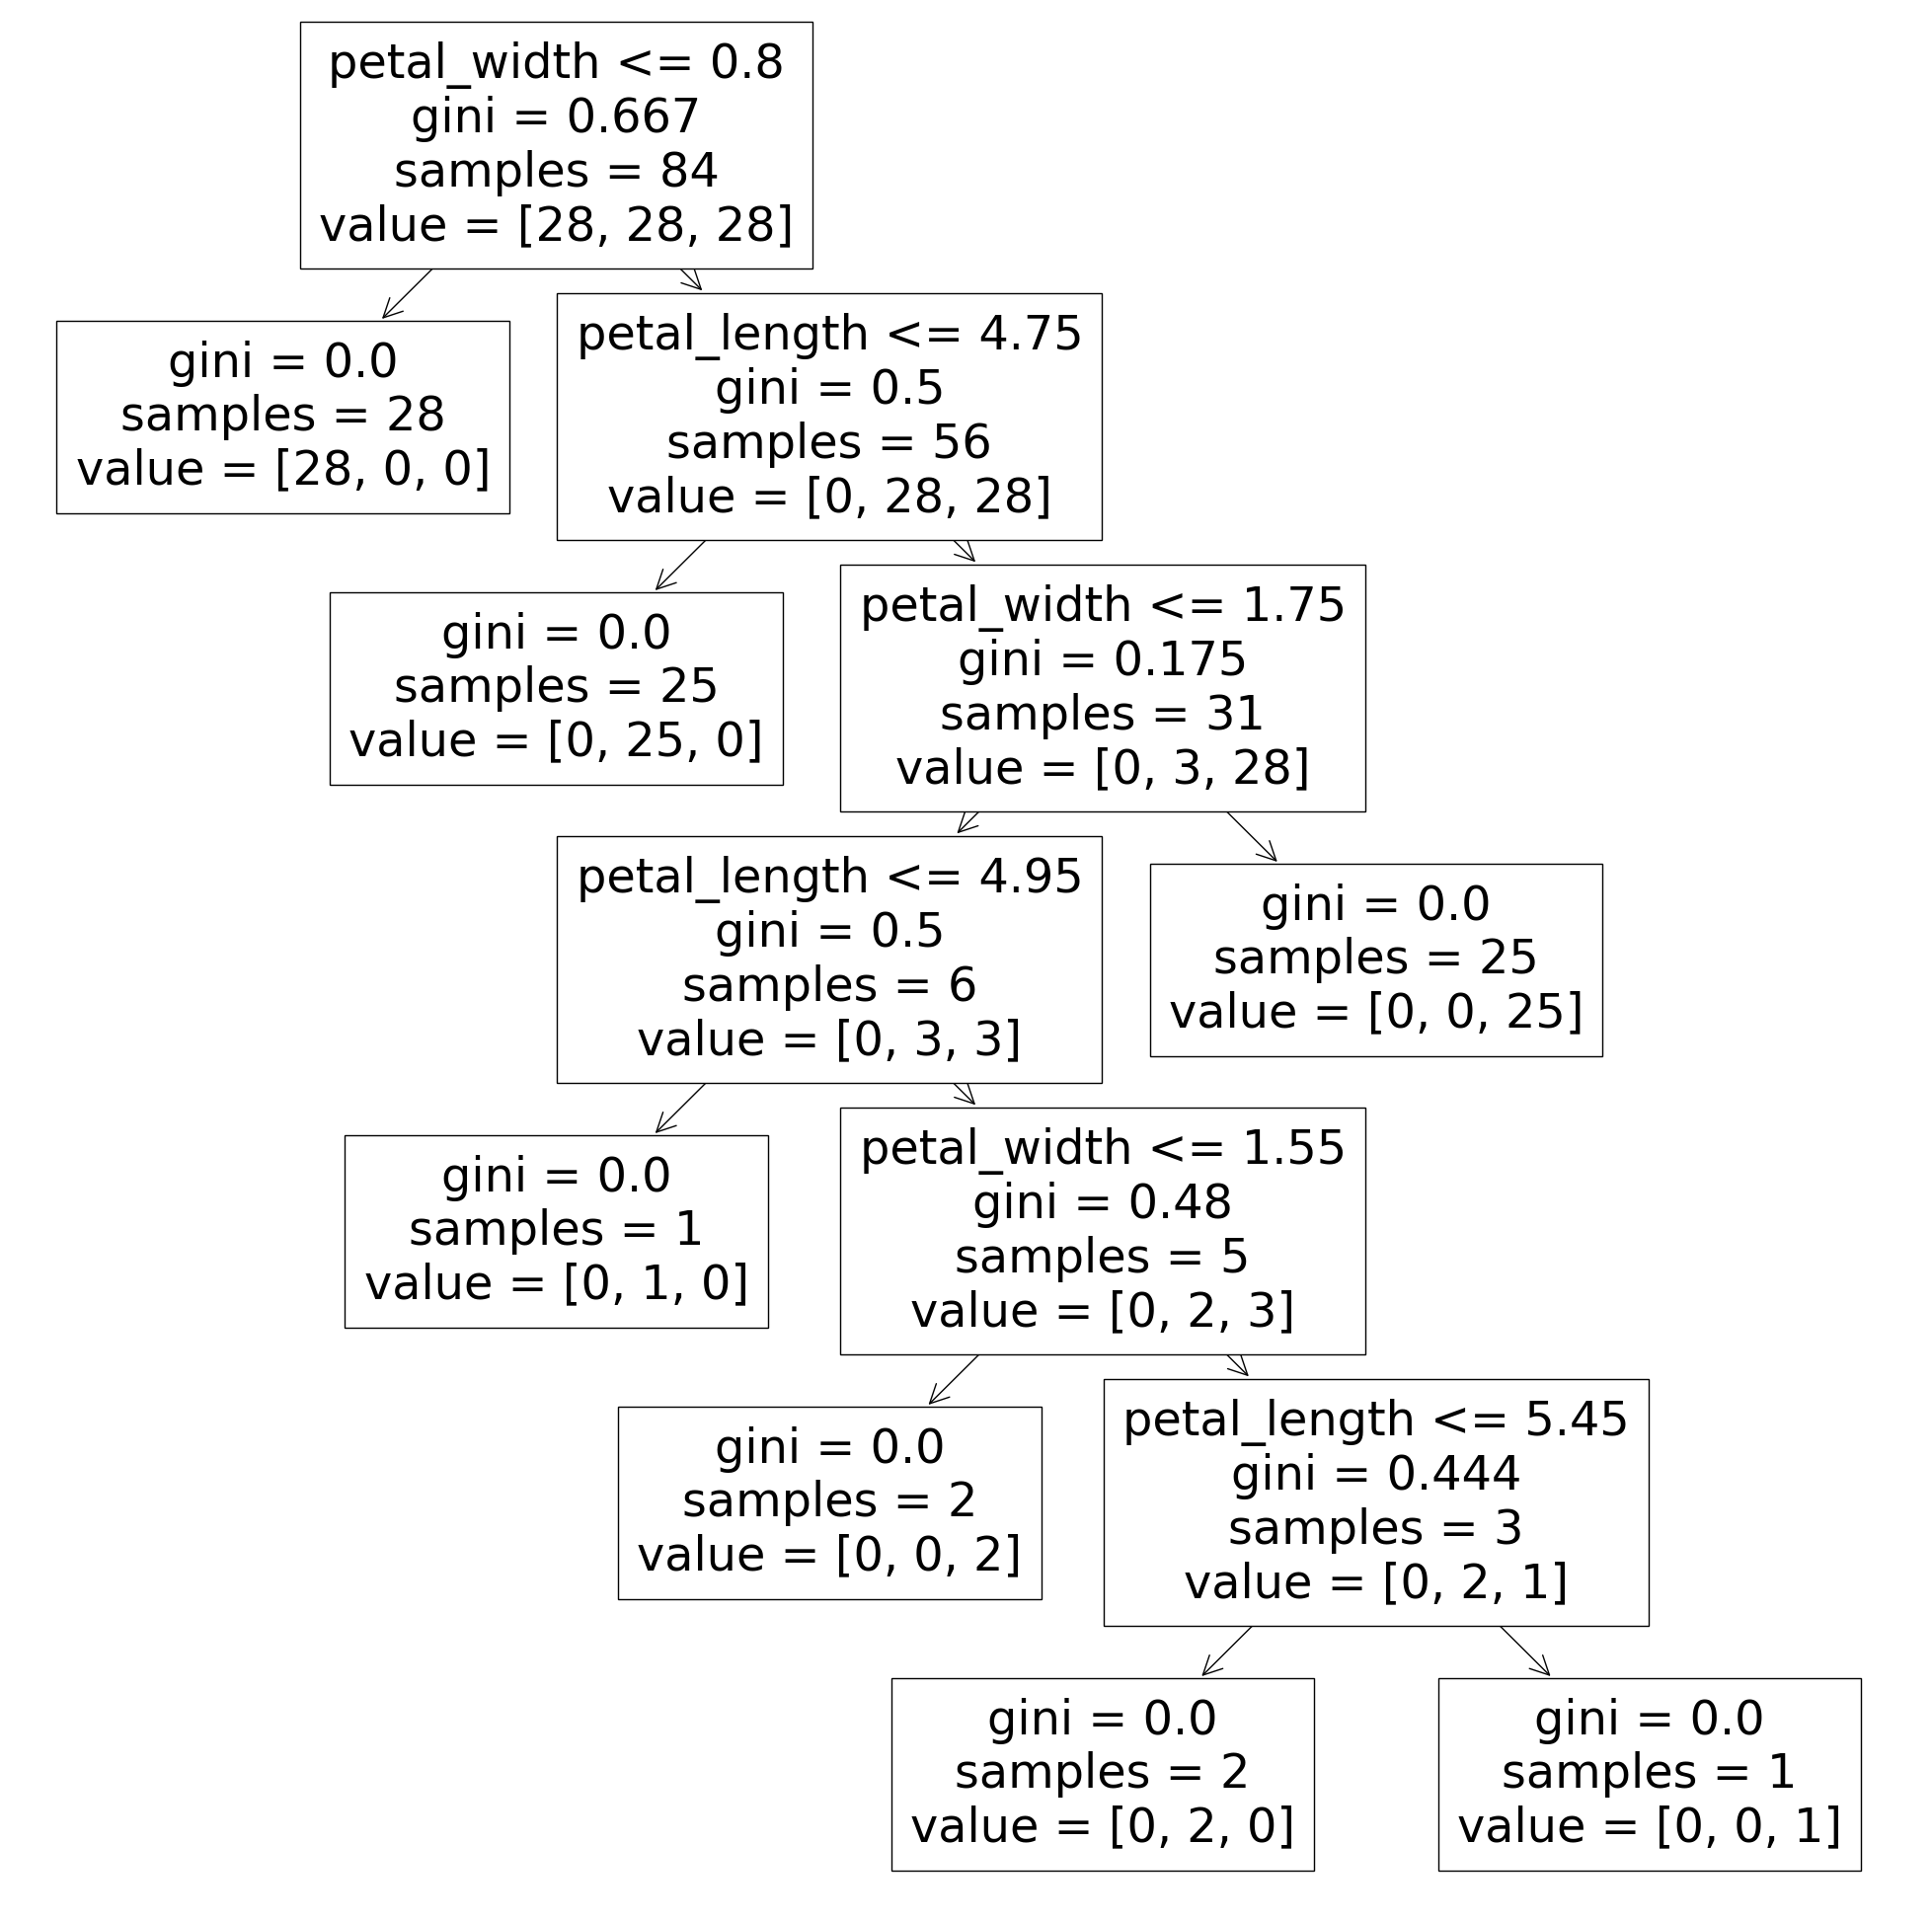

In [43]:
plt.figure(figsize=(25,25))
plot_tree(clf, feature_names=X_cols)
plt.show()

In [44]:
#classification report:
print(classification_report(train[y_cols],
                      model_1_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       1.00      1.00      1.00        28
   virginica       1.00      1.00      1.00        28

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [39]:
print(export_text(clf1, feature_names=X_cols))

|--- petal_width <= 0.80
|   |--- class: setosa
|--- petal_width >  0.80
|   |--- petal_width <= 1.75
|   |   |--- class: versicolor
|   |--- petal_width >  1.75
|   |   |--- class: virginica



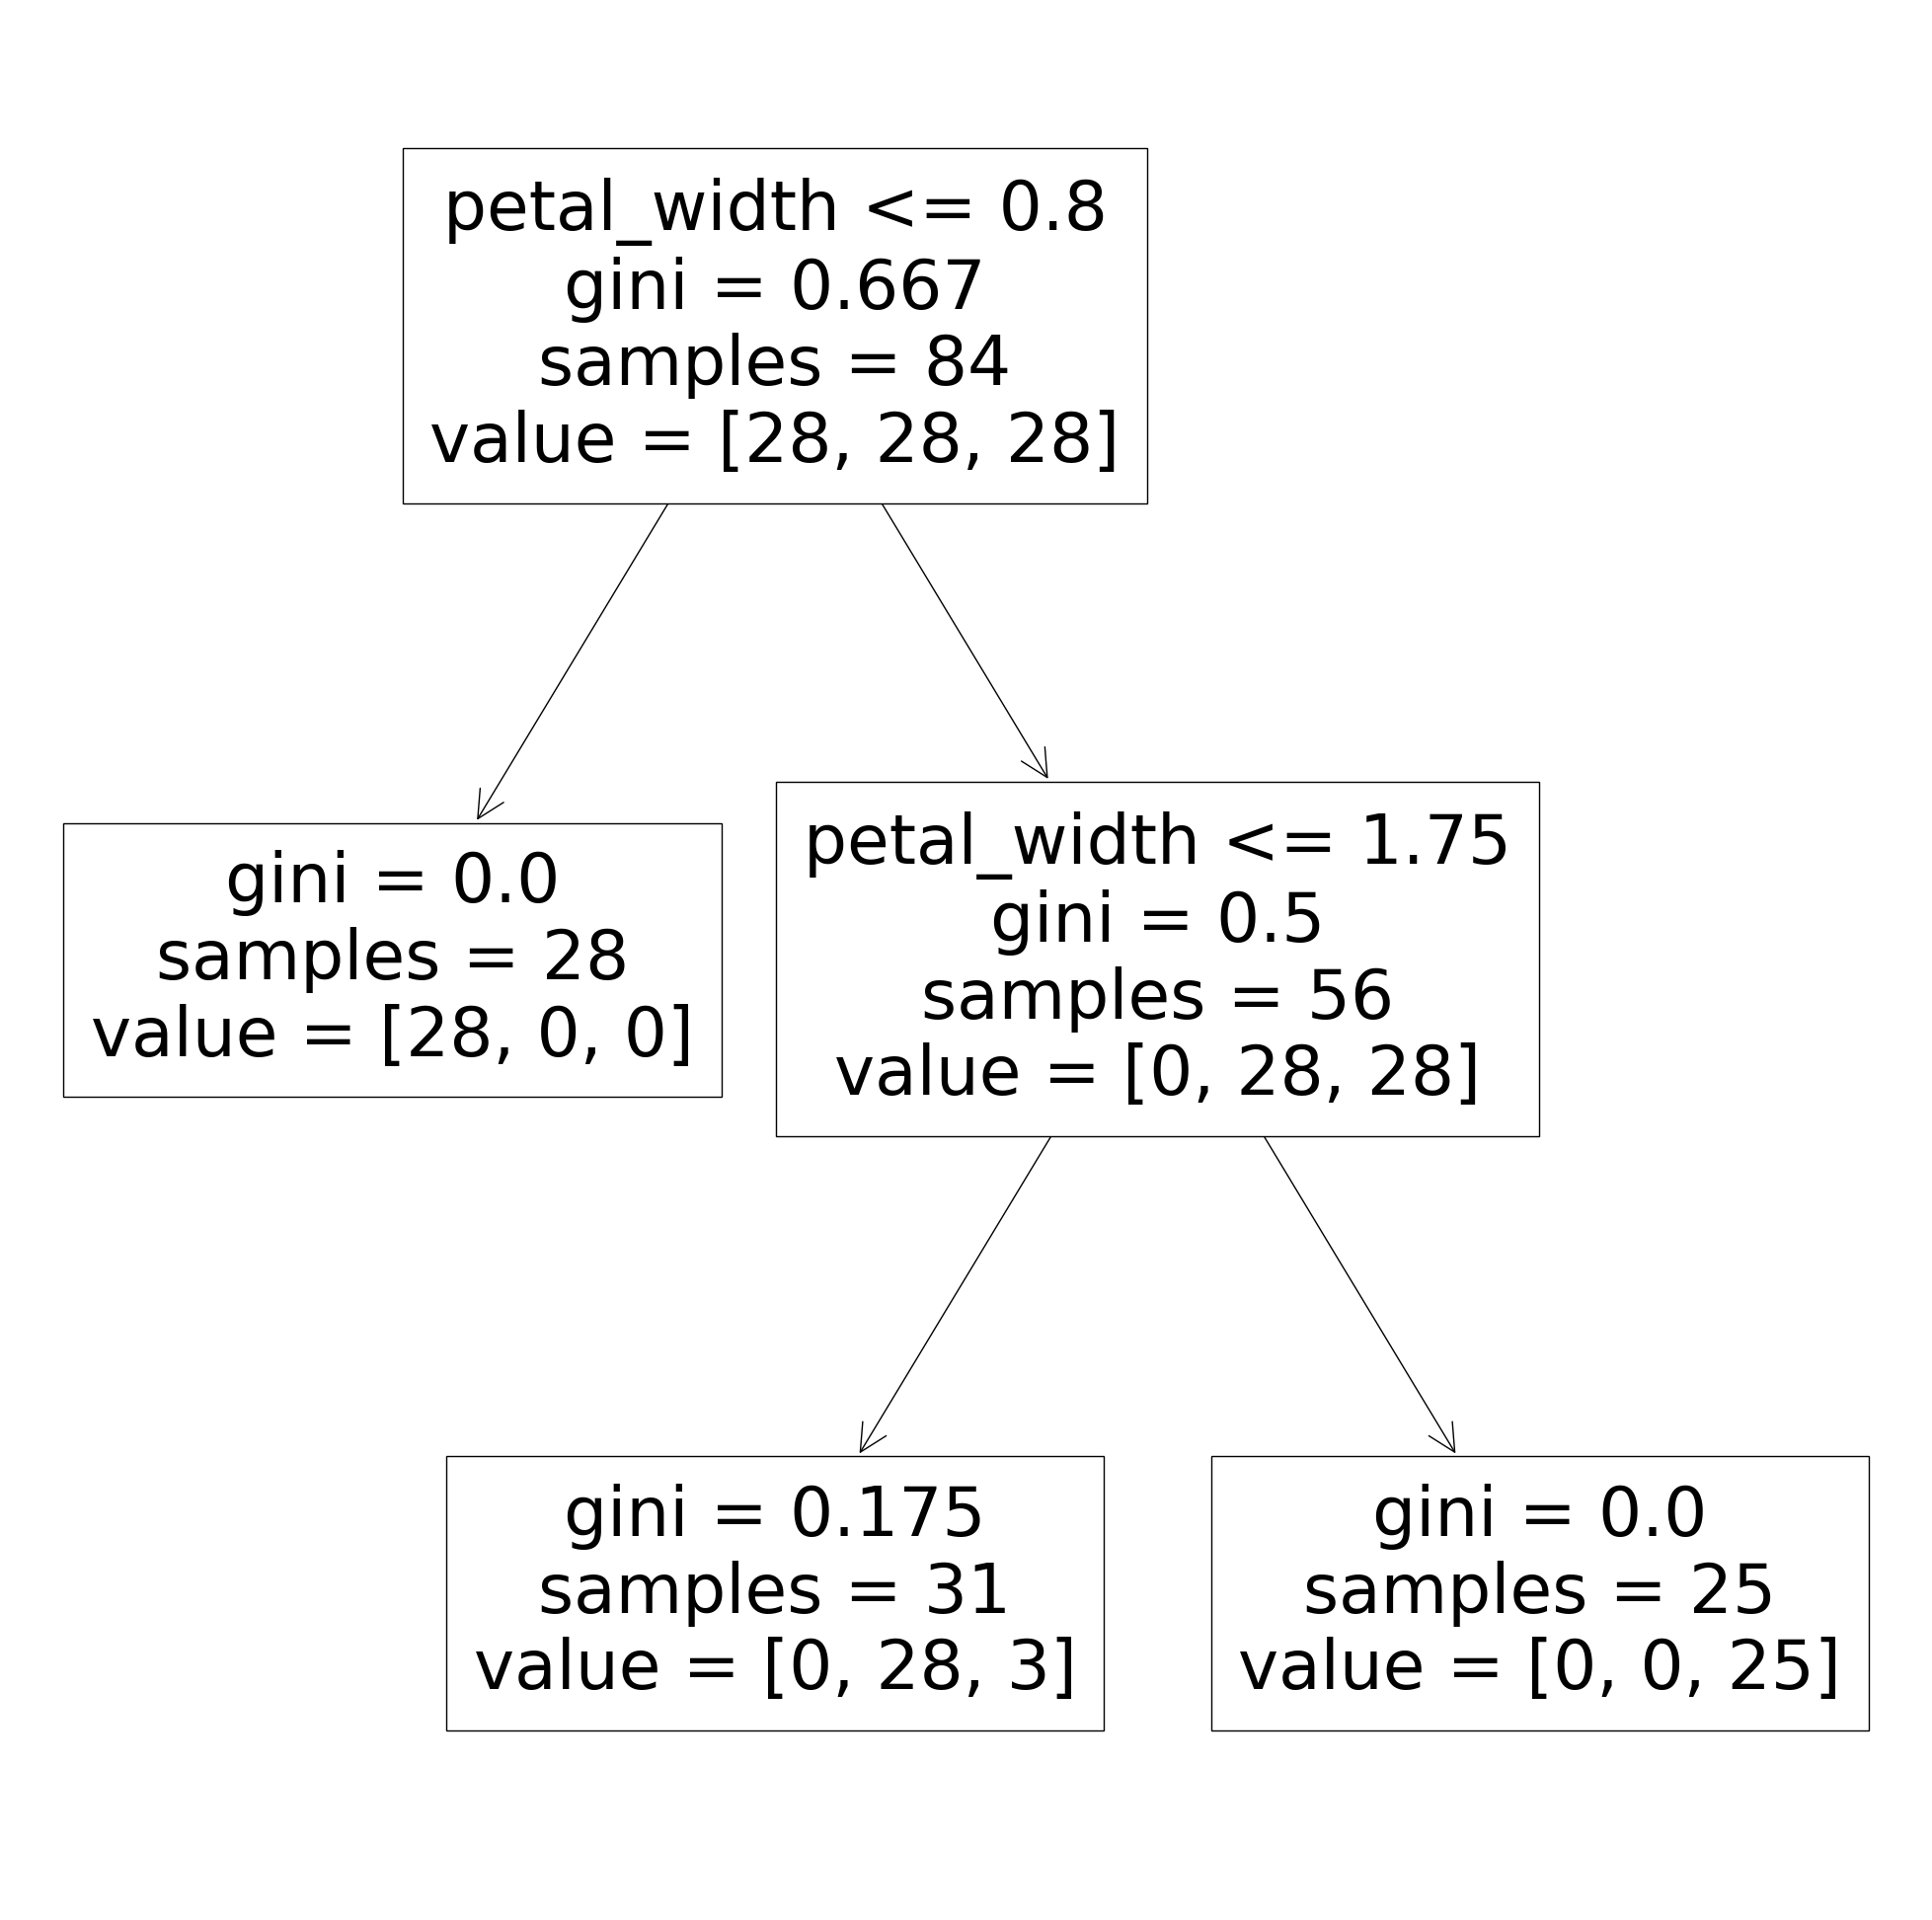

In [45]:
plt.figure(figsize=(25,25))
plot_tree(clf1, feature_names=X_cols)
plt.show()

In [46]:
#classification report:
print(classification_report(train[y_cols],
                      model_2_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.90      1.00      0.95        28
   virginica       1.00      0.89      0.94        28

    accuracy                           0.96        84
   macro avg       0.97      0.96      0.96        84
weighted avg       0.97      0.96      0.96        84



In [40]:
print(export_text(clf2, feature_names=X_cols))

|--- petal_width <= 0.80
|   |--- class: setosa
|--- petal_width >  0.80
|   |--- class: versicolor



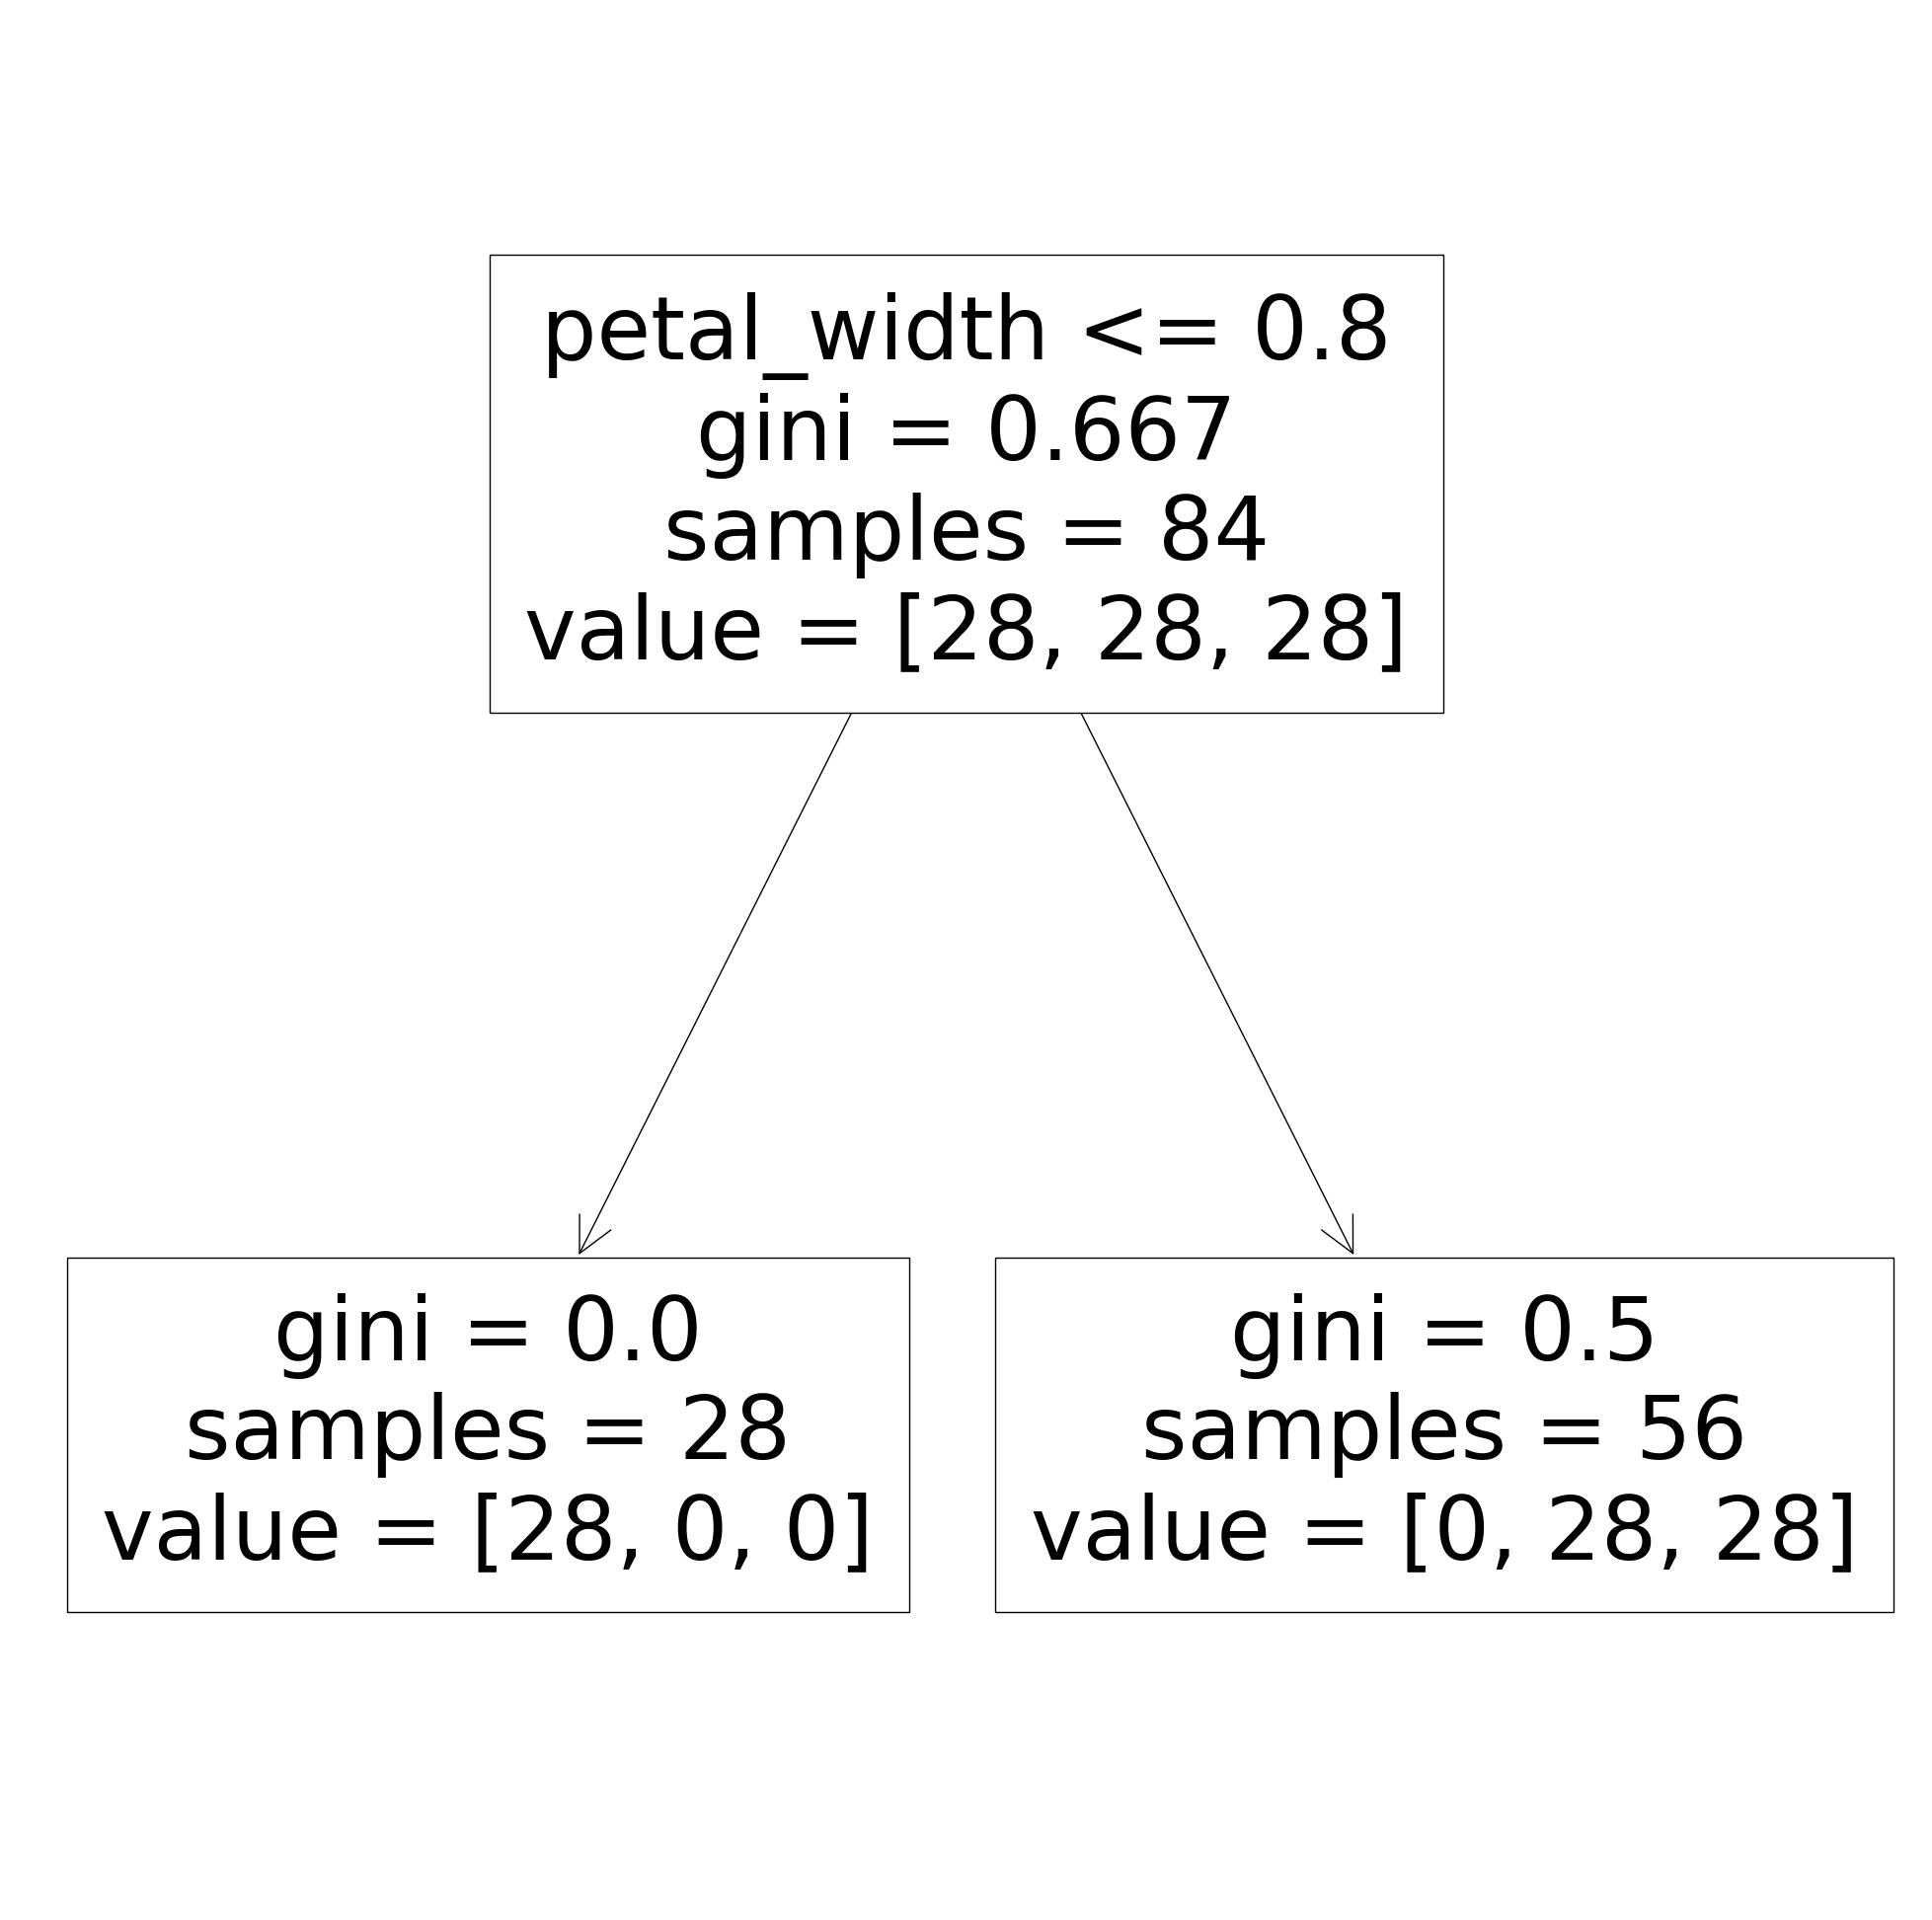

In [47]:
plt.figure(figsize=(25,25))
plot_tree(clf2, feature_names=X_cols)
plt.show()

In [48]:
#classification report:
print(classification_report(train[y_cols],
                      model_3_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.50      1.00      0.67        28
   virginica       0.00      0.00      0.00        28

    accuracy                           0.67        84
   macro avg       0.50      0.67      0.56        84
weighted avg       0.50      0.67      0.56        84



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random forest
comes from sklearn.ensemble

lets now train a random forest model on our data

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
X_train = train[X_cols]
y_train = train[y_cols]

In [57]:
# make the thing
rf1 = RandomForestClassifier()

In [58]:
# fit the thing
rf1.fit(X_train[['petal_length', 'petal_width']], y_train)

RandomForestClassifier()

In [60]:
# use the thing
rf1_preds = rf1.predict(X_train[['petal_length', 'petal_width']])

Model assessment and predicitons

In [61]:
# what do these models do on validate?

In [62]:
X_val, y_val = validate[X_cols], validate[y_cols]

In [66]:
print(f'''accuracy of decision tree 1
accuracy train: {clf.score(X_train, y_train)}
accuracy validate: {clf.score(X_val, y_val)}''')

accuracy of decision tree 1
accuracy train: 1.0
accuracy validate: 0.9722222222222222


In [67]:
print(f'''accuracy of decision tree 2
accuracy train: {clf1.score(X_train, y_train)}
accuracy validate: {clf1.score(X_val, y_val)}''')

accuracy of decision tree 2
accuracy train: 0.9642857142857143
accuracy validate: 0.9444444444444444


In [68]:
print(f'''accuracy of decision tree 3
accuracy train: {clf2.score(X_train, y_train)}
accuracy validate: {clf2.score(X_val, y_val)}''')

accuracy of decision tree 3
accuracy train: 0.6666666666666666
accuracy validate: 0.6666666666666666


In [71]:
print(f'''accuracy of random forest 1
accuracy train: {rf1.score(X_train[['petal_length', 'petal_width']], y_train)}
accuracy validate: {rf1.score(X_val[['petal_length', 'petal_width']], y_val)}''')

accuracy of random forest 1
accuracy train: 1.0
accuracy validate: 0.9722222222222222


whats ok

train/val/test:

train:

.fit()
.predict()
model.score()
val:

.predict()
.score()

test:

In [81]:
rf_feats = ['petal_length', 'petal_width']

In [82]:
val_pred = rf1.predict(X_val[rf_feats])

In [85]:
pd.DataFrame(classification_report(y_val, val_pred, output_dict=True))

,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,0.923077,1.000000,0.972222,0.974359,0.974359
recall,1.0,1.000000,0.916667,0.972222,0.972222,0.972222
f1-score,1.0,0.960000,0.956522,0.972222,0.972174,0.972174
support,12.0,12.000000,12.000000,0.972222,36.000000,36.000000


- decision tree model 2 had high level of consistnecly between accuracy on train and validate
- the othere two modwt perfomraingo models had 100% accuracy on train wich is certainly means they were overfit
- because of this model 2 appeas to be the best

In [86]:
# final test: try on the test set
# remember, test just once, not once per algoithm
clf1.score(test[X_cols], test[y_cols])

0.9666666666666667